### Multiple Linear Regression
Multilinear regression, commonly referred to as multiple linear regression, is a statistical technique that models the relationship between two or more explanatory variables and a response variable by fitting a linear equation to observed data. Essentially, it extends the simple linear regression model to incorporate multiple predictors, thereby providing a way to evaluate how multiple factors impact the outcome.

Assumptions in Multilinear Regression

1. **Linearity:** The relationship between the predictors(X) and the response (Y) is linear.

2. **Independence:** Observations are independent of each other.

3. **Homoscedasticity:** The residuals (Y - Y_hat) exhibit constant variance at all levels of the predictor.

4. **Normal Distribution of Errors:** The residuals of the model are normally distributed.

5. **No multicollinearity:** The independent variables should not be too highly correlated with each other.

Violations of these assumptions may lead to inefficiency in the regression parameters and unreliable predictions.

The general formula for multiple linear regression is:

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n + \epsilon $$


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [3]:
# Read the data from csv file
cars = pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [4]:
# Rearrange the columns
cars = pd.DataFrame(cars, columns=["HP","VOL","SP", "WT","MPG"])
cars.head()

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232


#### Description of columns
- MPG : Milege of the car (Mile per Gallon) (This is Y-column to be predicted)
- HP  : Horse Power of the car (X1 column)
- VOL : Volume of the car (size) (X2 column)
- SP  : Top speed of the car (Miles per Hour) (X3 column)
- WT  : Weight of the car (Pounds) (X4 Column)

### EDA 

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   VOL     81 non-null     int64  
 2   SP      81 non-null     float64
 3   WT      81 non-null     float64
 4   MPG     81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [8]:
#check for missing values
cars.isna().sum()

HP     0
VOL    0
SP     0
WT     0
MPG    0
dtype: int64

#### Observations about info(), missing values
- There are no missing values
- There are 81 observations (81 diffrent cars data)
- The data types of the columns are also relevant and valid

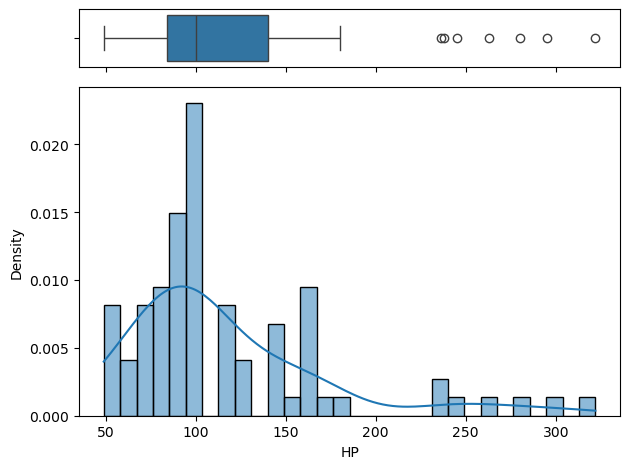

In [10]:
# Create a figure with two subplots (one above the other)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Creating a boxplot
sns.boxplot(data=cars, x='HP', ax=ax_box, orient='h')
ax_box.set(xlabel='')  # Remove x label for the boxplot

# Creating a histogram in the same x-axis
sns.histplot(data=cars, x='HP', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')

# Adjust layout
plt.tight_layout()
plt.show()

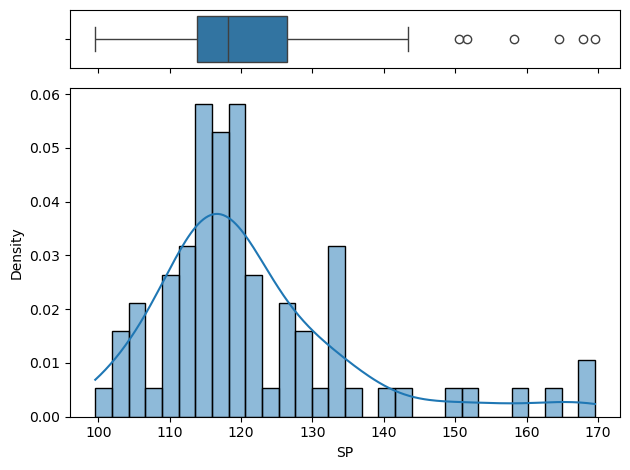

In [11]:
# Create a figure with two subplots (one above the other)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Creating a boxplot
sns.boxplot(data=cars, x='SP', ax=ax_box, orient='h')
ax_box.set(xlabel='')  # Remove x label for the boxplot

# Creating a histogram in the same x-axis
sns.histplot(data=cars, x='SP', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')

# Adjust layout
plt.tight_layout()
plt.show()

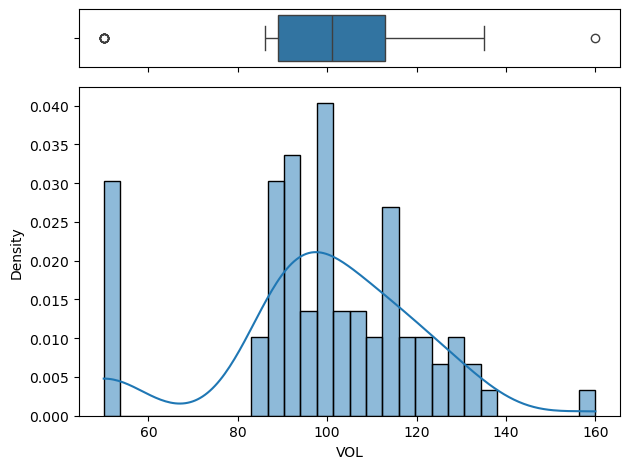

In [12]:
# Create a figure with two subplots (one above the other)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Creating a boxplot
sns.boxplot(data=cars, x='VOL', ax=ax_box, orient='h')
ax_box.set(xlabel='')  # Remove x label for the boxplot

# Creating a histogram in the same x-axis
sns.histplot(data=cars, x='VOL', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')

# Adjust layout
plt.tight_layout()
plt.show()

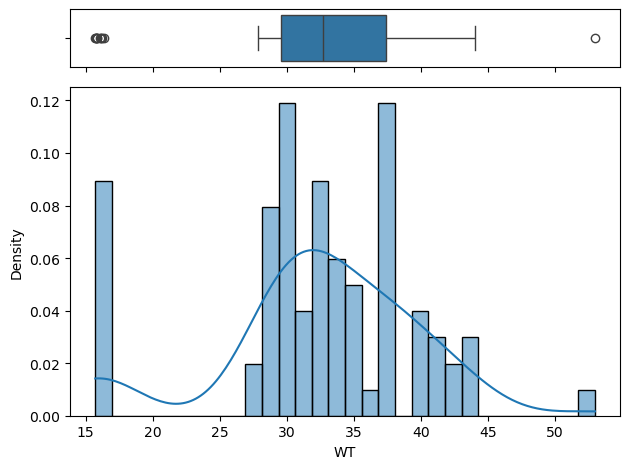

In [13]:
# Create a figure with two subplots (one above the other)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Creating a boxplot
sns.boxplot(data=cars, x='WT', ax=ax_box, orient='h')
ax_box.set(xlabel='')  # Remove x label for the boxplot

# Creating a histogram in the same x-axis
sns.histplot(data=cars, x='WT', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')

# Adjust layout
plt.tight_layout()
plt.show()

#### Observations from boxplot and histograms
- There are some extreme values (outliers) observed in towards the right tail of SP and HP distributions.
- In VOL and WT columns, a few outliers are observed in both tails of their distributions.
- The extreme values of cars data may have come from the specially designed nature of cars
- As this is multi-dimensional data, the outliers with respect to spatial dimensions may have to be considered while building the regression model

#### Checking for duplicated rows

In [16]:
cars[cars.duplicated()]

,HP,VOL,SP,WT,MPG


#### Pair plots and Correlation Coefficients

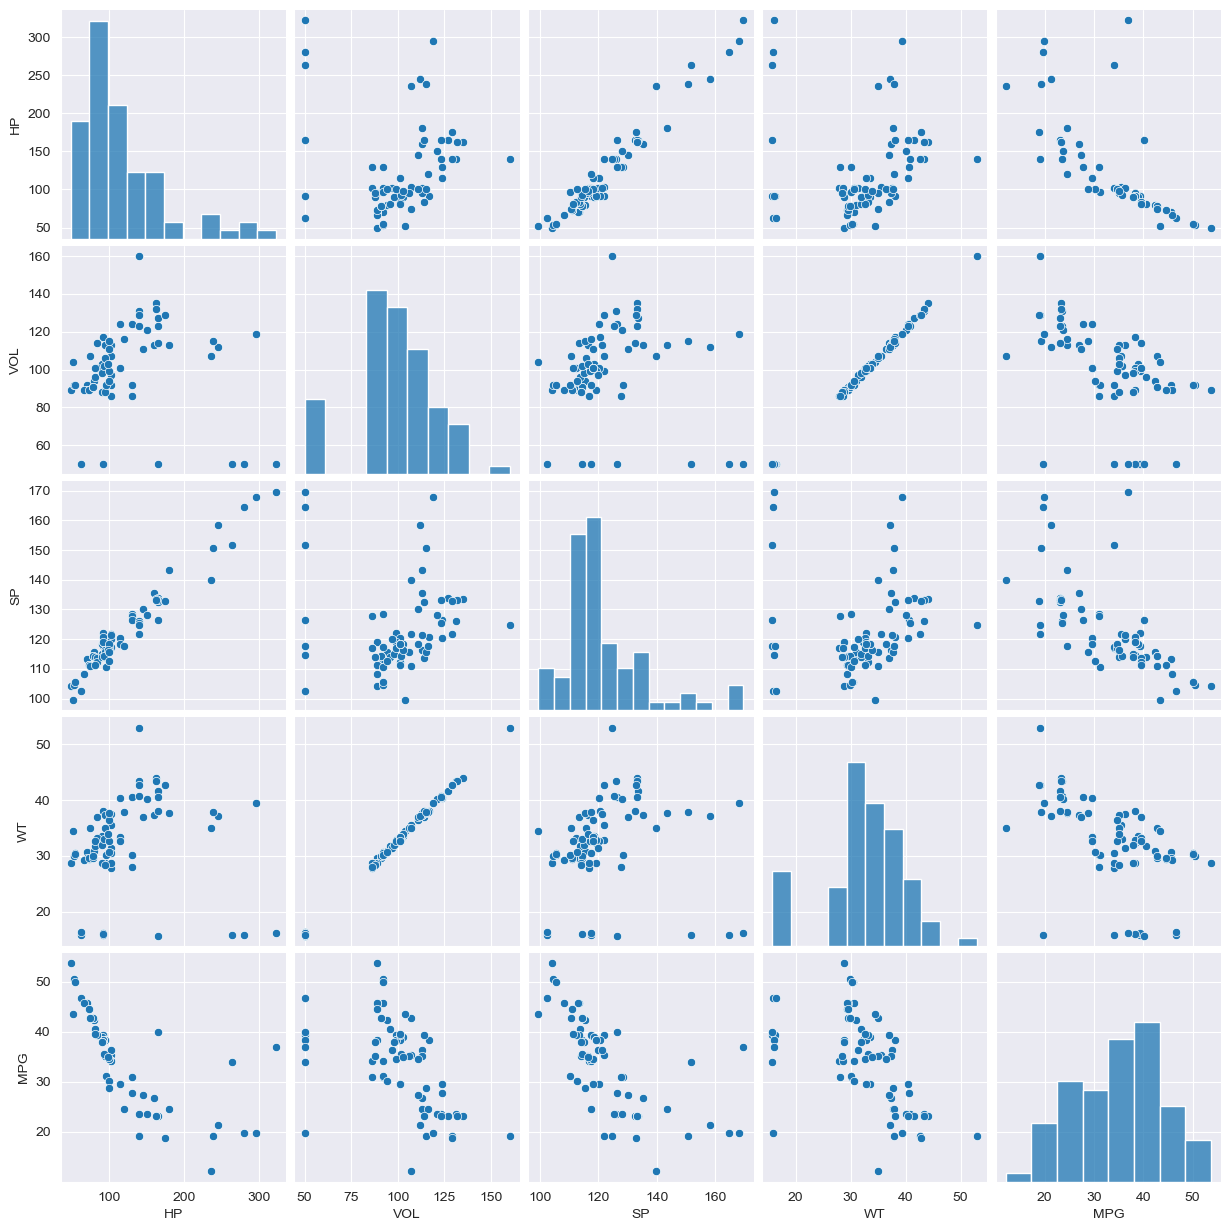

In [18]:
# Pair plot
sns.set_style(style='darkgrid')
sns.pairplot(cars)

In [19]:
 cars.corr()

,HP,VOL,SP,WT,MPG
HP,1.000000,0.077459,0.973848,0.076513,-0.725038
VOL,0.077459,1.000000,0.102170,0.999203,-0.529057
SP,0.973848,0.102170,1.000000,0.102439,-0.687125
WT,0.076513,0.999203,0.102439,1.000000,-0.526759
MPG,-0.725038,-0.529057,-0.687125,-0.526759,1.000000


#### Observations from correlation plots and Coeffcients
- Between x and y, all the x variables are showing moderate to high correlation strengths, highest being between HP and MPG
- Therefore this dataset qualifies for building a multiple linear regression model to predict MPG
- Among x columns (x1,x2,x3 and x4), some very high correlation strengths are observed between SP vs HP, VOL vs WT
- The high correlation among x columns is not desirable as it might lead to multicollinearity problem


#### Preparing a preliminary model considering all X columns

In [22]:
#Build model
import statsmodels.formula.api as smf 
model1 = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [23]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           1.54e-23
Time:                        09:25:51   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Observations from model summary
- The R-squared and adjusted R-suared values are good and about 75% of variability in Y is explained by X columns
- The probability value with respect to F-statistic is close to zero, indicating that all or someof X columns are significant
- The p-values for VOL and WT are higher than 5% indicating some interaction issue among themselves, which need to be further explored


#### Performance metrics for model1

In [26]:
cars

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232
...,...,...,...,...,...
76,322,50,169.598513,16.132947,36.900000
77,238,115,150.576579,37.923113,19.197888
78,263,50,151.598513,15.769625,34.000000
79,295,119,167.944460,39.423099,19.833733


In [27]:
# Find the performance metrics
# Create a data frame with actual y and predicted y columns

df1 = pd.DataFrame()
df1["actual_y1"] = cars["MPG"]
df1.head()

,actual_y1
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [28]:
# Predict for the given X data columns

pred_y1 = model1.predict(cars.iloc[:,0:4])
df1["pred_y1"] = pred_y1
df1.head()

,actual_y1,pred_y1
0,53.700681,43.441935
1,50.013401,42.388793
2,50.013401,42.279341
3,45.696322,42.538360
4,50.504232,42.172648


In [29]:
# Compute the Mean Squared Error (MSE), RMSE for model1

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df1["actual_y1"], df1["pred_y1"])
print("MSE :", mse )
print("RMSE :",np.sqrt(mse))


MSE : 18.897141152343096
RMSE : 4.347084212704315


#### F-test in Multiple Linear Regression
In the context of multiple linear regression, the F-test is a statistical test used to determine whether there is a significant relationship between the dependent variable and the set of independent variables. It evaluates whether the explanatory variables, as a group, have a statistically significant impact on the dependent variable. This test essentially compares the variance explained by the model with the variance of the residuals.

The F-test checks the null hypothesis that a model with no independent variables fits the data as well as your model. The alternative hypothesis is that your model fits the data better than the intercept-only model.

Null Hypothesis (H0): The model with no independent variables fits the data as well as a model with one or more independent variables. In mathematical terms, this means that all regression coefficients are equal to zero, except for the intercept. This can be expressed as:
$$ H_0: \beta_1 = \beta_2 = \cdots = \beta_k = 0 $$

Alternative Hypothesis (H1): At least one of the regression coefficients is not zero, implying that the corresponding independent variable does make a significant contribution to explaining the variation in the dependent variable. This can be expressed as:
$$ H_1: \text{at least one } \beta_i \neq 0 \quad (i = 1, 2, \ldots, k) $$

Understanding the F-statistic
The F-statistic is calculated as the ratio of two variances:

The variance explained by the model (Mean Square Regression, MSR).
The variance of the errors or residuals (Mean Square Error, MSE).
The formula for the F-statistic in multiple regression is:
$$ F = \frac{\text{MSR}}{\text{MSE}} = \frac{\frac{\text{SSR}}{k}}{\frac{\text{SSE}}{n-k-1}} $$

where:

1. SSR (Sum of Squares Regression) is the sum of the squares of the differences between the predicted values and the mean of the dependent variable.
2. SSE (Sum of Squares Error) is the sum of the squares of the residuals.
3. n is the number of observations.
4. k is the number of independent variables.

The F-statistic follows an F-distribution under the null hypothesis, and a significantly high value of F leads to the rejection of the null hypothesis, indicating that the model with the independent variables provides a better fit to the data than the model without them.




#### -------------------------------------------------------------------------------------------------------------------------------------------

#### Understanding the t and |p| values 
In the context of interpreting t-values and p-values in multiple linear regression, the hypothesis statements focus on testing whether each individual regression coefficient significantly differs from zero. This involves the following specific hypotheses for each coefficient in the model:

Null Hypothesis (H0): The null hypothesis states that the regression coefficient 
βi is equal to zero, suggesting that there is no effect of the predictor variable 
X on the dependent variable Y:βi =0

Alternative Hypothesis (H1): The alternative hypothesis states that the regression coefficient   βi is not equal to zero, indicating that the predictor variable Xi
does have an effect on the dependent variable Y. This is formally expressed as: βi!=0

So if the regression coefficients have to be significant the observed p values shall be 
less than 0.05


##### --------------------------------------------------------------------------------------------

#### Log-Likelihood 
Log-Likelihood is a measure of model fit. It is the logarithm of the likelihood function, which measures the probability of observing the data given the parameters of the model. In the context of OLS and other linear models, the likelihood function is often based on the assumption that the residuals are normally distributed. A higher log-likelihood value indicates a model with a better fit to the data. The log-likelihood can be conceptualized as the sum of the logs of the probabilities that the model assigns to the observed outcomes, under the model's assumptions.

#### Akaike Information Criterion (AIC)
AIC is a widely used criterion for model selection among a set of candidate models. It is based on the number of parameters in the model and the likelihood of the model. The formula for AIC is:
$$
\text{AIC} = 2k - 2\ln(L)
$$
where 
k is the number of estimated parameters in the model, and ln(L) is the log-likelihood of the model. The AIC penalizes the inclusion of additional parameters within the model; therefore, it balances model complexity and model fit. A lower AIC value indicates a better model.

#### Bayesian Information Criterion (BIC)
BIC is similar to AIC but includes a different penalty term for the number of parameters. The formula for BIC is:
$$
\text{BIC} = k \ln(n) - 2\ln(L)
$$

BIC imposes a larger penalty for the number of parameters than AIC, especially when the sample size n is large, making it more stringent against complex models. Like AIC, a lower BIC value indicates a better model.

In practice, when comparing several models, the ones with the lower AIC or BIC values are typically preferred. However, it's important to use these criteria in conjunction with other diagnostics

### Multicollinearity
Multicollinearity in multiple linear regression refers to a situation where two or more predictor variables are highly correlated. This can lead to problems in estimating the coefficients of the model accurately, as it becomes difficult to disentangle the individual effects of the correlated predictors. Here are some common methods used to identify multicollinearity:

Correlation Matrix: A simple initial check involves computing the correlation coefficients between all pairs of predictors. High correlation coefficients (typically above 0.7 or below -0.7) suggest potential multicollinearity.

Variance Inflation Factor (VIF): VIF is a more precise method for detecting the level of multicollinearity. It measures how much the variance of an estimated regression coefficient increases if your predictors are correlated. If no factors are correlated, the VIFs will be 1.

Rule of Thumb: A VIF value greater than 10 indicates significant multicollinearity.

#### Calculating Variance Inflation Factor(VIF)
The VIF for each predictor is calculated as:
$$VIF_k = \frac{1}{1 - R^2_k}$$

This formula represents the VIF for the k-th predictor, where Rk  is the coefficient of determination obtained by regressing the k-th predictor on all other predictors. The VIF measures how much the variance of an estimated regression coefficient is increased because of collinearity.

#### Checking for multicollinearity among X-columns using VIF method

In [37]:
#cars.head()

In [38]:
# Compute VIF values
rsq_hp = smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared  
vif_wt = 1/(1-rsq_wt) 

rsq_vol = smf.ols('VOL~WT+SP+HP',data=cars).fit().rsquared  
vif_vol = 1/(1-rsq_vol) 

rsq_sp = smf.ols('SP~WT+VOL+HP',data=cars).fit().rsquared  
vif_sp = 1/(1-rsq_sp) 

# Storing vif values in a data frame
d1 = {'Variables':['Hp','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Hp,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


#### Observations for VIF values:
- The ideal range of VIF values shall be between 0 to 10. However slightly higher values can be tolerated
- As seen from the very high VIF values for VOL and WT, it is clear that they are prone to multicollinearity problem.
- Hence it is decided to drop one of the columns (either VOL or WT) to overcome the multicollinearity.
- It is decided to drop WT and retain VOL column in further models

In [40]:
cars1 = cars.drop("WT", axis=1)
cars1.head()

,HP,VOL,SP,MPG
0,49,89,104.185353,53.700681
1,55,92,105.461264,50.013401
2,55,92,105.461264,50.013401
3,70,92,113.461264,45.696322
4,53,92,104.461264,50.504232


In [41]:
# Build model2 on cars1 dataset
import statsmodels.formula.api as smf 
model2 = smf.ols('MPG~VOL+SP+HP',data=cars1).fit()

In [42]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           1.56e-24
Time:                        09:25:52   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
SP             0.4007      0.156      2.571      0.012       0.090       0.711
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
#cars1

#### Performance metrics for model2

In [45]:
# Find the performance metrics
# Create a data frame with actual y and predicted y columns

df2 = pd.DataFrame()
df2["actual_y2"] = cars["MPG"]
df2.head()

,actual_y2
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [46]:
# Predict for the given X data columns

pred_y2 = model2.predict(cars1.iloc[:,0:4])
df2["pred_y2"] = pred_y2
df2.head()

,actual_y2,pred_y2
0,53.700681,43.590769
1,50.013401,42.256794
2,50.013401,42.256794
3,45.696322,42.361497
4,50.504232,42.269544


In [47]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df2["actual_y2"], df2["pred_y2"])
print("MSE :", mse )
print("RMSE :",np.sqrt(mse))


MSE : 18.911053388711217
RMSE : 4.348684098518909


#### Observations from model2 summary()
- The adjusted R-suared value improved slightly to 0.76
- All the p-values for model parameters are less than 5% hence they are significant
- Therefore the HP, VOL, SP columns are finalized as the significant predictor for the MPG response variable
- There is no improvement in MSE value

### Model Deletion Diagnostics
#### Detecting Influencers/Outliers using Cook’s Distance

Cook's Distance is a commonly used measure to detect influential observations in a regression analysis. It evaluates how much a regression model's predictions would change if a specific observation were excluded from the analysis. Essentially, it helps in identifying points that have a disproportionate impact on the calculation of the regression coefficients.

##### Formula for Cook's Distance

The formula for Cook's Distance, \( D_i \), for the \( i \)-th observation is given by:
$$
\
D_i = \frac{(Y_i - \hat{Y}_i)^2}{p \cdot MSE} \cdot \frac{h_{ii}}{(1 - h_{ii})^2}
\
$$
Where:

- Yi is the observed response value for the \( i \)-th case.
- 𝑌̂  is the predicted response value for the \( i \)-th case based on the fitted model.
- \( p \) is the number of regression coefficients (including the intercept).
- \( MSE \) is the mean squared error of the regression model.
- \( h_{ii} \) is the leverage of the \( i \)-th observation, which measures the influence of that data point on its own prediction. 

### Interpretation

A high value of Cook's Distance indicates that the corresponding observation has a large influence on the fitted values. There isn't a strict universal threshold for what constitutes a "large" Cook's Distance, but a common rule of thumb is that observations with a Cook's Distance greater than \( 4/n \) (where \( n \) is the number of observations in the dataset) may be considered influential. However, the context and other diagnostics should also be considered when deciding on the influence of a data point based on its Cook's Distance.

In [51]:
cars1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   VOL     81 non-null     int64  
 2   SP      81 non-null     float64
 3   MPG     81 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.7 KB


In [52]:
# from statsmodels.graphics.regressionplots import influence_plot
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance
c

array([6.04797739e-02, 2.80207825e-02, 1.84833331e-02, 7.27752720e-03,
       2.96019879e-02, 4.81278004e-03, 2.07405847e-02, 2.55586700e-03,
       4.05692942e-03, 7.54004910e-04, 2.97311924e-03, 8.72887201e-02,
       3.32487183e-04, 3.06716174e-03, 5.27414633e-03, 5.29293219e-03,
       1.16531605e-03, 7.63273362e-02, 6.47114749e-04, 5.79692771e-04,
       1.13359020e-05, 1.03054091e-02, 1.53244850e-04, 3.10730928e-04,
       1.49488694e-03, 5.85742198e-02, 1.00598054e-02, 6.55605611e-05,
       3.30438001e-02, 1.81295962e-04, 1.33814932e-02, 9.97753151e-04,
       4.02570308e-04, 1.13711936e-03, 2.85608656e-03, 4.41332141e-05,
       3.27632348e-04, 4.70959014e-03, 1.21704644e-02, 8.96948188e-03,
       2.35324656e-04, 9.75839299e-06, 4.49488700e-03, 4.48437031e-03,
       1.02593360e-05, 4.75617324e-04, 2.22586830e-05, 4.66305687e-05,
       1.27051048e-02, 5.33728062e-03, 2.98638028e-03, 5.00671925e-03,
       1.29659561e-04, 1.14393086e-02, 8.61438068e-04, 2.46695414e-04,
      

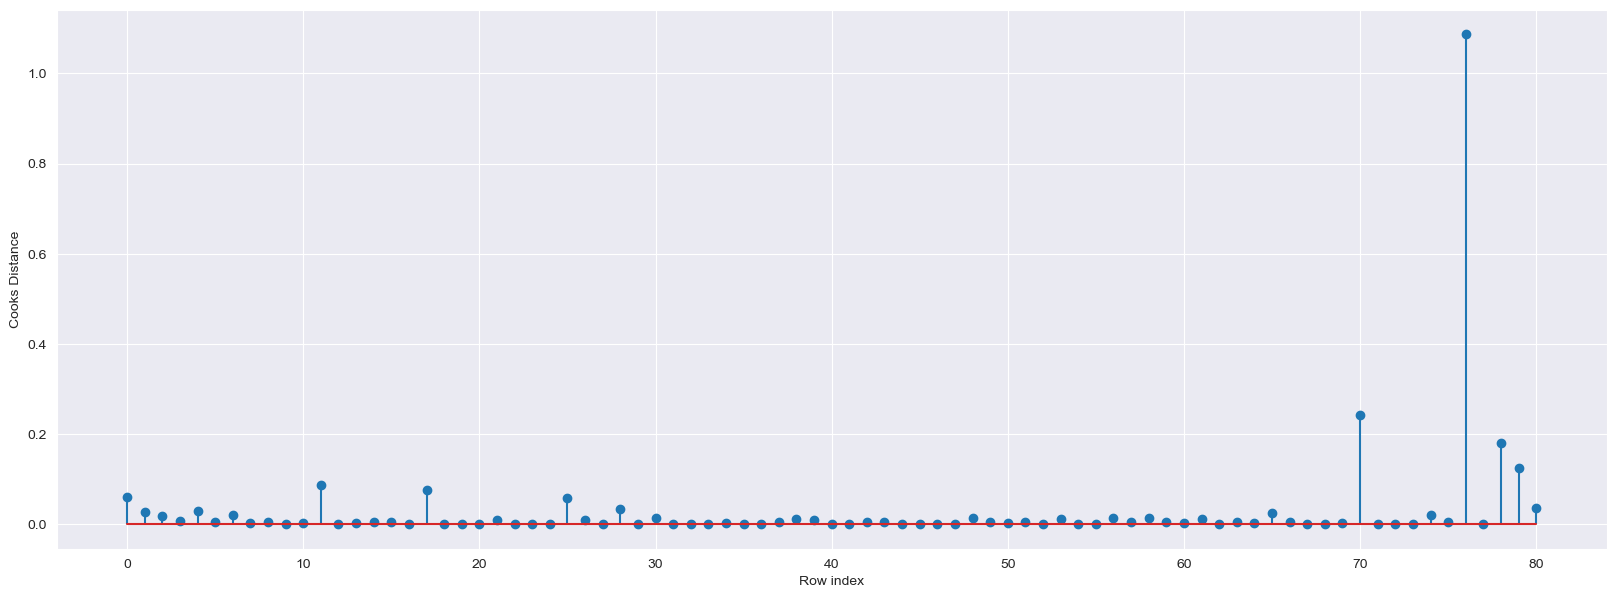

In [53]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [54]:
#The Cook's distance is considered high if it is greater than 0.5 and extreme if it is greater than 1
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(76, 1.0865193998179918)

#### Identification of High Influence points (spatial outliers)

In [160]:
cars1.shape

(81, 4)

#### Leverage (Hat Values):
Leverage values diagnose if a data point has an extreme value in terms of the independent variables. A point with high leverage has a great ability to influence the regression line. The threshold for considering a point as having high leverage is typically set at 3(k+1)/n, where k is the number of predictors and n is the sample size.

In [58]:
# Define variables and assign values
k = 3   # no of x-columns in cars1
n = 81  # no of observations (rows)
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.14814814814814814

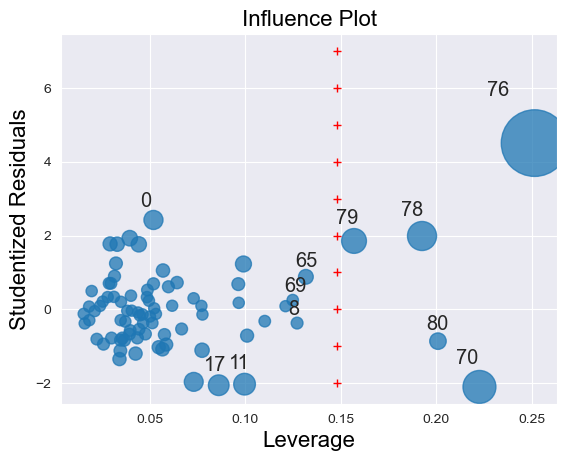

In [59]:
from statsmodels.graphics.regressionplots import influence_plot

influence_plot(model1,alpha=.05)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

#### Observations
- From the above plot, it is evident that data points 65,70, 76,78,79,80 are the influencers.
- as their H Leverage values are higher and size is higher


In [133]:
cars1[cars1.index.isin([65,70, 76,78,79,80])]

In [63]:
#Discard the data points which are influencers and reasign the row number (reset_index())
cars2=cars1.drop(cars1.index[[65,70, 76,78,79,80]],axis=0).reset_index(drop=True)

In [64]:
cars2

,HP,VOL,SP,MPG
0,49,89,104.185353,53.700681
1,55,92,105.461264,50.013401
2,55,92,105.461264,50.013401
3,70,92,113.461264,45.696322
4,53,92,104.461264,50.504232
...,...,...,...,...
70,162,132,133.140074,23.203569
71,140,160,124.715241,19.086341
72,140,129,121.864163,19.086341
73,175,129,132.864163,18.762837


#### Build Model3 on cars2 dataset

In [66]:
# Rebuild the model model
model3= smf.ols('MPG~VOL+SP+HP',data = cars2).fit()

In [135]:
model3.summary()

#### Performance Metrics for model3

In [142]:
df3= pd.DataFrame()
df3["actual_y3"] =cars2["MPG"]
df3.head()

In [137]:
# Predict on all X data columns
pred_y3 = model3.predict(cars2.iloc[:,0:3])
df3["pred_y3"] = pred_y3
df3.head()

In [139]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df3["actual_y3"], df3["pred_y3"])
print("MSE :", mse )
print("RMSE :",np.sqrt(mse))


MSE : 8.681197361563031
RMSE : 2.946387171022001


#### Comparison of models  
                     

| Metric         | Model 1 | Model 2 | Model 3 |
|----------------|---------|---------|---------|
| R-squared      | 0.771   | 0.770   | 0.885   |
| Adj. R-squared | 0.758   | 0.761   | 0.880   |
| MSE            | 18.89   | 18.91   | 8.68    |
| RMSE           | 4.34    | 4.34    | 2.94    |


- **From the above comparison table it is observed that model3 is the best among all with superior performance metrics**

#### Check the validity of model assumptions for model3

In [146]:
model3.resid

In [148]:
model3.fittedvalues

In [156]:
# The model is built with VOL, SP, HP by ignoring WT

import statsmodels.api as sm
qqplot=sm.qqplot(model3.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [158]:
sns.displot(model3.resid, kde = True)

In [78]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

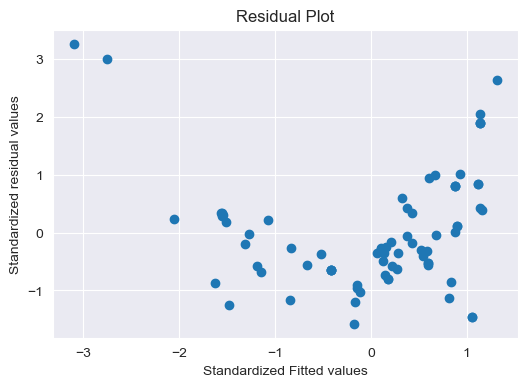

In [79]:
plt.figure(figsize=(6,4))
plt.scatter(get_standardized_values(model3.fittedvalues),
            get_standardized_values(model3.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

#### Final Comments
- The residuals are approximately normally distributed
- The homoscedasticity is also satifactory as the residuals are distributed above and below the zero error line
- Further model improvements are possible by deleting some more outlier datapoints as observed in q-q plot.